#Problem Statement 2: - Fraud Check
##Use **Random Forest** to prepare a model on fraud data  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_check=pd.read_csv('/content/Fraud_check.csv')
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Understanding

In [3]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_check.shape

(600, 6)

In [7]:
fraud_check.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
fraud=fraud_check.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital_status',
                            'Taxable.Income':'taxable_income','City.Population':'city_population',
                            'Work.Experience':'work_experience','Urban':'urban'})
fraud.head()

,undergrad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [43]:
data=pd.get_dummies(fraud,columns=['undergrad','marital_status','urban'],drop_first=True)

In [44]:
data["taxable_income"]=pd.cut(data["taxable_income"],bins=[10002,30000,99620],labels=["Risky","Good"])

In [45]:
data=pd.get_dummies(data,columns=["taxable_income"],drop_first=True)

In [46]:

data.tail(10)

,city_population,work_experience,undergrad_YES,marital_status_Married,marital_status_Single,urban_YES,taxable_income_Good
590,85195,14,0,1,0,1,1
591,132859,18,1,0,1,1,0
592,75143,16,1,0,1,0,1
593,131963,10,0,0,0,1,1
594,97526,9,0,1,0,1,1
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1
599,158137,16,0,0,0,0,1


In [47]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [48]:
data_norm=norm_func(data.iloc[:,1:])
data_norm.tail(10)

,work_experience,undergrad_YES,marital_status_Married,marital_status_Single,urban_YES,taxable_income_Good
590,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.533333,0.0,0.0,0.0,0.0,1.0


#Visualization

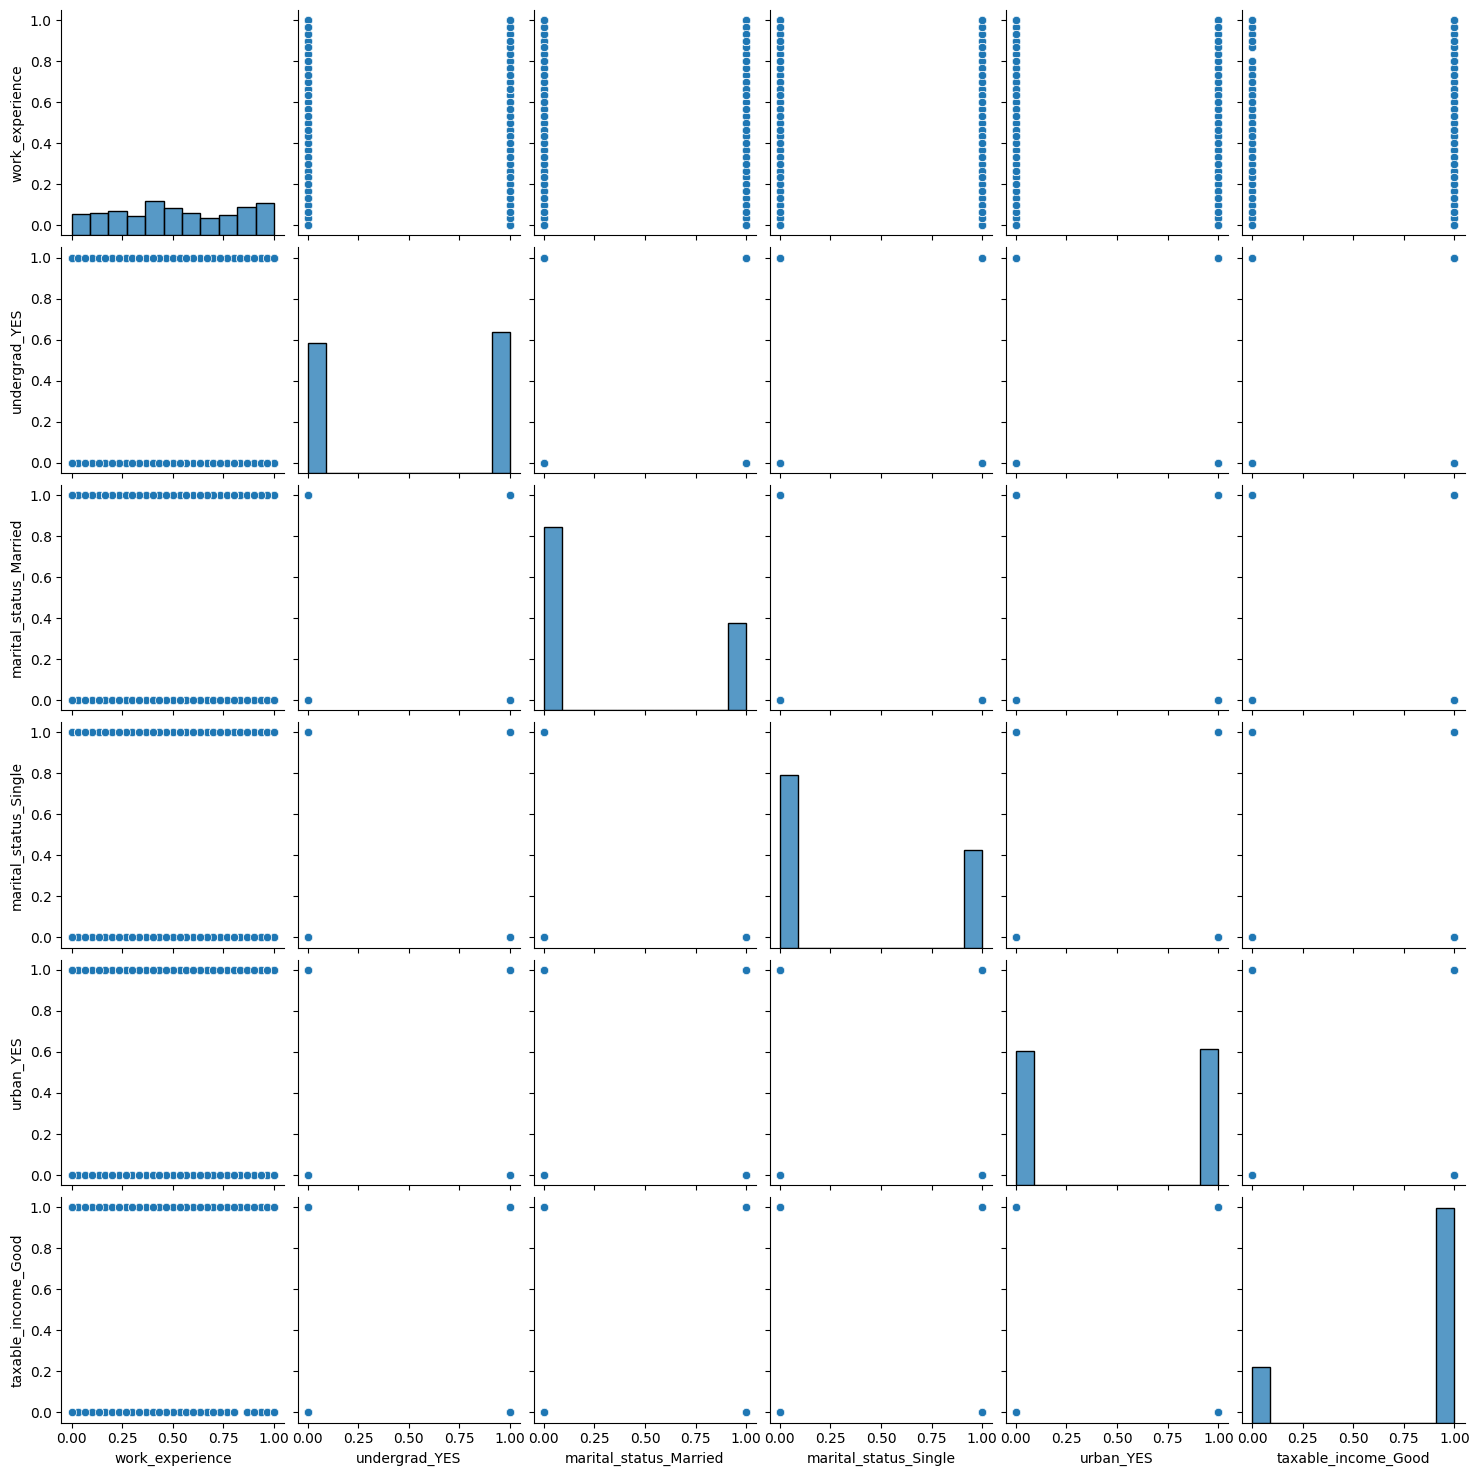

In [51]:
# Pair Plot
sns.pairplot(data_norm)

<Axes: xlabel='taxable_income_Good', ylabel='Density'>

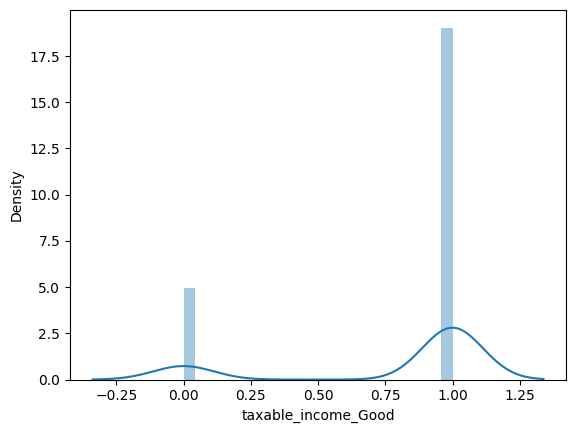

In [54]:
# Distplot of Taxable Income
sns.distplot(data['taxable_income_Good'])

<Axes: xlabel='work_experience', ylabel='Density'>

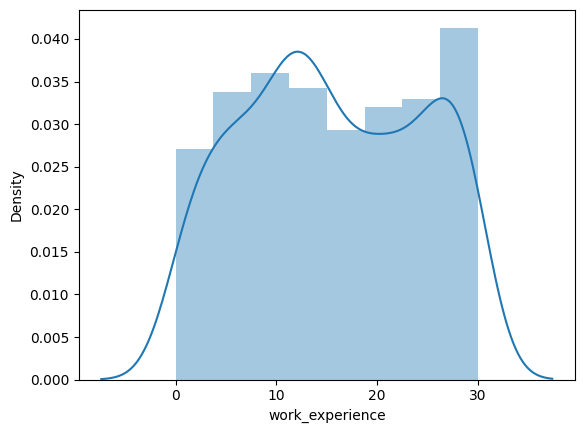

In [56]:
sns.distplot(fraud['work_experience'])

<Axes: >

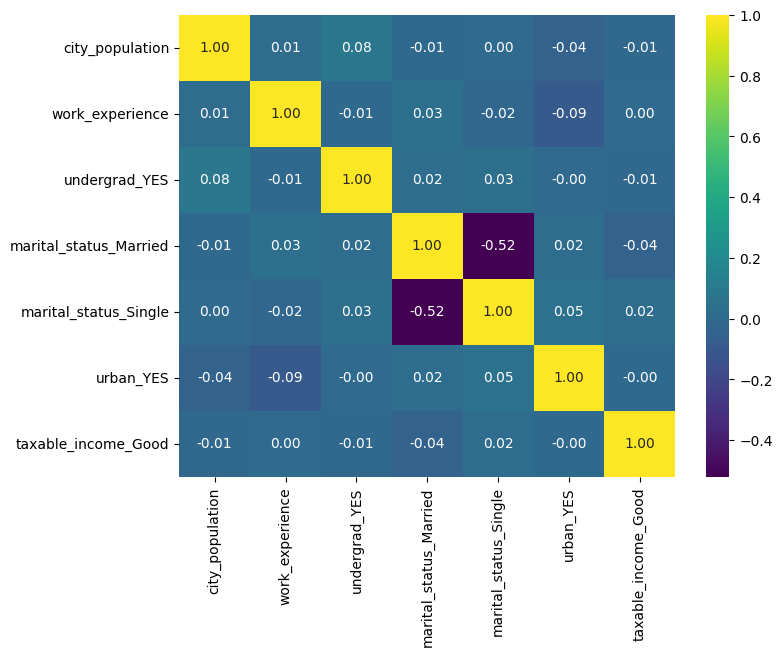

In [58]:
# Heatmap
plt.figure(figsize = (8, 6));
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt=".2f")

In [64]:
x=data_norm.drop(['taxable_income_Good'],axis=1)
y=data_norm['taxable_income_Good']

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', min_samples_leaf=1, min_samples_split=2,n_estimators=200)

RandomForestClassifier(n_estimators=200)

In [68]:
forest_new = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')
forest_new.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [69]:
RandomForestClassifier(max_depth=10,
                      min_samples_split=20,
                      n_estimators=100
                       )

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [70]:
print('Train accuracy: {}'.format(forest_new.score(xtrain, ytrain)))
print('Test accuracy: {}'.format(forest_new.score(xtest, ytest)))

Train accuracy: 0.79375
Test accuracy: 0.7916666666666666
